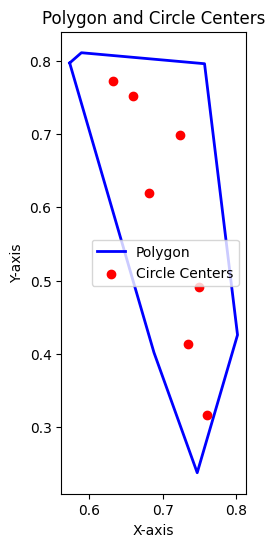

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_polygon_and_centers(pvertices, clist):
    fig, ax = plt.subplots(figsize=(6,6))
    
    # Convert to NumPy arrays
    pvertices = np.array(pvertices)
    clist = np.array(clist)

    # Plot the polygon (close the shape)
    polygon_closed = np.vstack([pvertices, pvertices[0]])  # Add first vertex at the end
    ax.plot(polygon_closed[:, 0], polygon_closed[:, 1], 'b-', linewidth=2, label='Polygon')

    # Plot circle centers
    ax.scatter(clist[:, 0], clist[:, 1], color='red', label='Circle Centers', zorder=3)

    # Formatting
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_aspect('equal')
    ax.legend()
    plt.title('Polygon and Circle Centers')
    plt.show()

# Example usage
pvertices = np.array([[0.573, 0.797], [0.688, 0.402], [0.747, 0.238], 
                      [0.802, 0.426], [0.757, 0.796], [0.589, 0.811]])

clist = [(0.7490863467660889, 0.4917635308023209),
         (0.6814339441396109, 0.6199470305156477),
         (0.7241617773773865, 0.6982813914515696),
         (0.6600700275207232, 0.7516911829987891),
         (0.6315848053622062, 0.7730550996176769),
         (0.7348437356868305, 0.41342916986639894),
         (0.7597683050755328, 0.31729154508140384)]

plot_polygon_and_centers(pvertices, clist)


In [34]:
def find_convex_cover(pvertices, clist):
    """
    Return a list of the circle centers with the sum of their areas minimized
    and with the vertices from the pvertices within at least one circle from clist.

    :param: pvertices: An (n-1)-long iterable of polygon vertices that make up the convex polygon.
    :param clist: A list of (x_i,y_i) tuples of circle-centers that are within the convex polygon.

    :return: An m-long list of radii, r_i, corresponding to the m circle-centers.
    """
    assert(iter(pvertices)), "Polygon vertices must be iterable"
    assert(len(pvertices) > 2), "List of polygon vertices must be greater than 2 to form a polygon"
    for p in pvertices:
        assert(iter(p) and len(p) == 2 and isinstance(p[0],(int,float)) and isinstance(p[1],(int,float))), "The list of point vertices must contain valid coordinates"

    assert(isinstance(clist, list)), "List of circle centers must contain tuples of the (x_i,y_i) centers"
    assert(len(clist) > 0), "clist must not be empty"
    for c in clist:
        assert(isinstance(c,tuple) and len(c) == 2 and isinstance(c[0],(int,float)) and isinstance(c[1],(int,float))), "The list of circle centers must contain tuples of valid coordinates"

    pvertices = np.array(pvertices)  
    clist = np.array(clist) 
    m = len(clist)  
    n = len(pvertices) 
    distances = np.linalg.norm(pvertices[:,None,:] - clist[None,:,:], axis=-1)
    min_indices = np.argmin(distances, axis=1)
    radius = np.zeros(m)
    for i,index in enumerate(min_indices):
        radius[index] = max(radius[index], distances[i,index])
    return radius.tolist()

C:\Users\Francisco\AppData\Local\Temp\ipykernel_36188\3086771342.py:22: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = Circle((x, y), r, color='orange', alpha=0.3, edgecolor='red', linewidth=1.5)


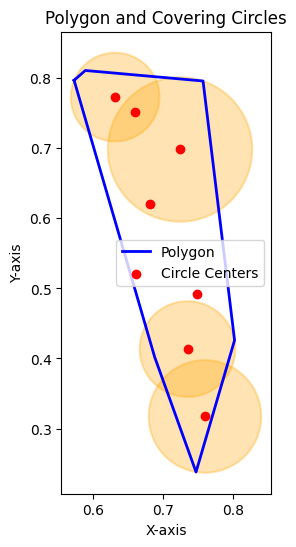

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def plot_polygon_and_circles(pvertices, clist, radii):
    fig, ax = plt.subplots(figsize=(6,6))
    
    # Convert polygon vertices and circle centers to NumPy arrays
    pvertices = np.array(pvertices)
    clist = np.array(clist)

    # Plot polygon (close it by appending the first point at the end)
    polygon_closed = np.vstack([pvertices, pvertices[0]])  
    ax.plot(polygon_closed[:, 0], polygon_closed[:, 1], 'b-', linewidth=2, label='Polygon')

    # Plot circle centers
    ax.scatter(clist[:, 0], clist[:, 1], color='red', label='Circle Centers', zorder=3)

    # Plot circles
    for (x, y), r in zip(clist, radii):
        if r > 0:  # Only plot circles with non-zero radius
            circle = Circle((x, y), r, color='orange', alpha=0.3, edgecolor='red', linewidth=1.5)
            ax.add_patch(circle)

    # Formatting
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_aspect('equal')
    ax.legend()
    plt.title('Polygon and Covering Circles')
    plt.show()

pvertices = np.array([[0.573, 0.797], [0.688, 0.402], [0.747, 0.238], 
                      [0.802, 0.426], [0.757, 0.796], [0.589, 0.811]])

clist = [(0.7490863467660889, 0.4917635308023209),
         (0.6814339441396109, 0.6199470305156477),
         (0.7241617773773865, 0.6982813914515696),
         (0.6600700275207232, 0.7516911829987891),
         (0.6315848053622062, 0.7730550996176769),
         (0.7348437356868305, 0.41342916986639894),
         (0.7597683050755328, 0.31729154508140384)]

# Compute radii
radii = find_convex_cover(pvertices, clist)

# Plot the polygon and the circles
plot_polygon_and_circles(pvertices, clist, radii)



In [10]:
x = np.arange(3)
y = np.arange(5)
print(x.shape)
print(x)
print(y.shape)
print(y)
print(x[:,None])
x[:,None]*y

(3,)
[0 1 2]
(5,)
[0 1 2 3 4]
[[0]
 [1]
 [2]]


array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4],
       [0, 2, 4, 6, 8]])

In [33]:
pvertices = np.array([[ 0.573,  0.797],           
                        [ 0.688,  0.402],                                                              
                        [ 0.747,  0.238],                                                              
                        [ 0.802,  0.426],                                                              
                        [ 0.757,  0.796],                                                              
                        [ 0.589,  0.811]]) 
clist = np.array([(0.7490863467660889, 0.4917635308023209),                                       
            (0.6814339441396109, 0.6199470305156477),                                                
            (0.7241617773773865, 0.6982813914515696),                                                
            (0.6600700275207232, 0.7516911829987891),                                                
            (0.6315848053622062, 0.7730550996176769),                                                
            (0.7348437356868305, 0.41342916986639894),                                               
            (0.7597683050755328, 0.31729154508140384)])
#print(pvertices)
#print(pvertices.shape)
##print(pvertices[:,None:])
#print(pvertices[:,None,:].shape)
#print(clist[None,:,:].shape)
#print(clist[None,:,:])
distances = np.linalg.norm(pvertices[:,None,:] - clist[None,:,:], axis=-1)
print(distances)
print(np.argmin(distances, axis=1))

[[0.35238573 0.20761906 0.18054154 0.09815334 0.06328932 0.41631716
  0.51478403]
 [0.10857731 0.21804592 0.29848004 0.3508048  0.37531928 0.04821785
  0.11102347]
 [0.25377211 0.38753379 0.46084764 0.52099468 0.54736151 0.17584985
  0.080313  ]
 [0.08440792 0.2283673  0.28318889 0.35527294 0.38663753 0.06832269
  0.11662351]
 [0.30433937 0.19158517 0.10308868 0.10657716 0.12749682 0.38321187
  0.47871646]
 [0.35712681 0.21223871 0.17599486 0.09256611 0.05703754 0.42347723
  0.52240775]]
[4 5 6 5 2 4]
